In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report, confusion_matrix
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GlobalMaxPooling1D, Reshape
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from warnings import simplefilter,filterwarnings
from keras.models import Sequential, load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
# from keras.utils import set_random_seed
from keras.utils import to_categorical
from keras.utils import plot_model
import matplotlib.ticker as ticker
from keras.optimizers import Adam
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
import keras.backend as K
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.io
import pickle
import random
import math
import csv
import glob
import sys
import gc
import os
import re
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# data_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/DataSet'
# code_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/Codes'
# results_path = '/content/drive/My Drive/Colab Notebooks/Tasks/Disease prediction based on human activity recognition using smartphones/Results'
# model_info_path = os.path.join(results_path,'model info')
# images_path = os.path.join(results_path, "images")

In [7]:
data_path = "C:\\Users\\user\\Python_Anaconda\\task\\06\\DataSet"
results_path = "C:\\Users\\user\\Python_Anaconda\\task\\06\\Results"
model_info_path = os.path.join(results_path,'model info')
images_path = os.path.join(results_path, "images")

In [8]:
train = pd.read_csv(os.path.join(data_path,"train.csv"))
test = pd.read_csv(os.path.join(data_path,"test.csv"))
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [9]:
X_train = train.drop('Activity', axis=1)
X_test = test.drop('Activity', axis=1)

y_train = np.array(train['Activity'].tolist())
y_test = np.array(test['Activity'].tolist())

print("X_train Shape : ", X_train.shape, ", Y_train Shape", y_train.shape)
print("X_test Shape : ", X_test.shape, ", Y_test Shape", y_test.shape)

X_train Shape :  (7352, 562) , Y_train Shape (7352,)
X_test Shape :  (2947, 562) , Y_test Shape (2947,)


In [10]:
num_classes = len(set(y_test))
print(num_classes)

6


In [11]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_encoded = to_categorical(y_train_encoded, num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes)

num_features = X_train.shape[1]
timesteps = 1

X_train_reshaped = X_train.values.reshape(-1, timesteps, num_features)
X_test_reshaped = X_test.values.reshape(-1, timesteps, num_features)

In [12]:
classes_number = [0, 1, 2, 3, 4, 5]
classes = label_encoder.inverse_transform(classes_number)

In [13]:
clf = LogisticRegression(random_state=40, max_iter=5)
clf.fit(np.squeeze(X_train_reshaped), np.argmax(y_train_encoded, axis=1))
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = clf.predict(np.squeeze(X_test_reshaped))
classification_rep = classification_report(y_test_labels, y_pred_labels)
print(list(zip(classes, classes_number)))
print(classification_rep)

[('LAYING', 0), ('SITTING', 1), ('STANDING', 2), ('WALKING', 3), ('WALKING_DOWNSTAIRS', 4), ('WALKING_UPSTAIRS', 5)]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.36      0.52       491
           2       0.57      0.98      0.72       532
           3       0.38      0.88      0.53       496
           4       1.00      0.05      0.09       420
           5       1.00      0.26      0.41       471

    accuracy                           0.62      2947
   macro avg       0.81      0.59      0.55      2947
weighted avg       0.81      0.62      0.57      2947



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


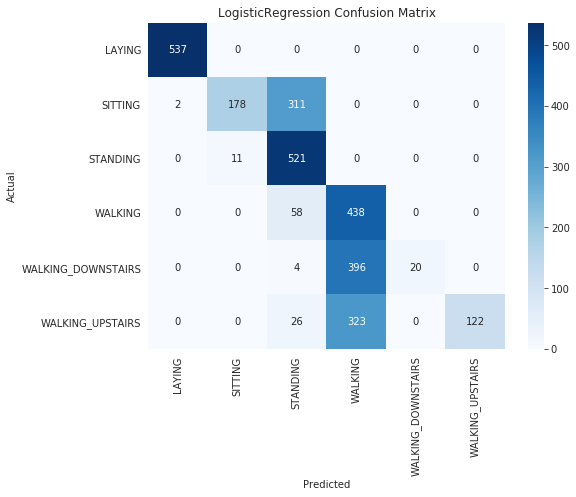

In [14]:
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogisticRegression Confusion Matrix')
plt.savefig("{} .png".format(os.path.join(images_path , 'LogisticRegression Confusion Matrix')))
plt.show()

In [11]:
svc_model = SVC(random_state=40, max_iter=5)
svc_model.fit(np.squeeze(X_train_reshaped), np.argmax(y_train_encoded, axis=1))
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = svc_model.predict(np.squeeze(X_test_reshaped))
classification_rep = classification_report(y_test_labels, y_pred_labels)
print(list(zip(classes, classes_number)))
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[('LAYING', 0), ('SITTING', 1), ('STANDING', 2), ('WALKING', 3), ('WALKING_DOWNSTAIRS', 4), ('WALKING_UPSTAIRS', 5)]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       537
           1       0.64      0.20      0.30       491
           2       0.56      0.89      0.69       532
           3       0.58      0.73      0.65       496
           4       0.88      0.54      0.67       420
           5       0.53      0.57      0.55       471

    accuracy                           0.67      2947
   macro avg       0.69      0.65      0.64      2947
weighted avg       0.69      0.67      0.65      2947



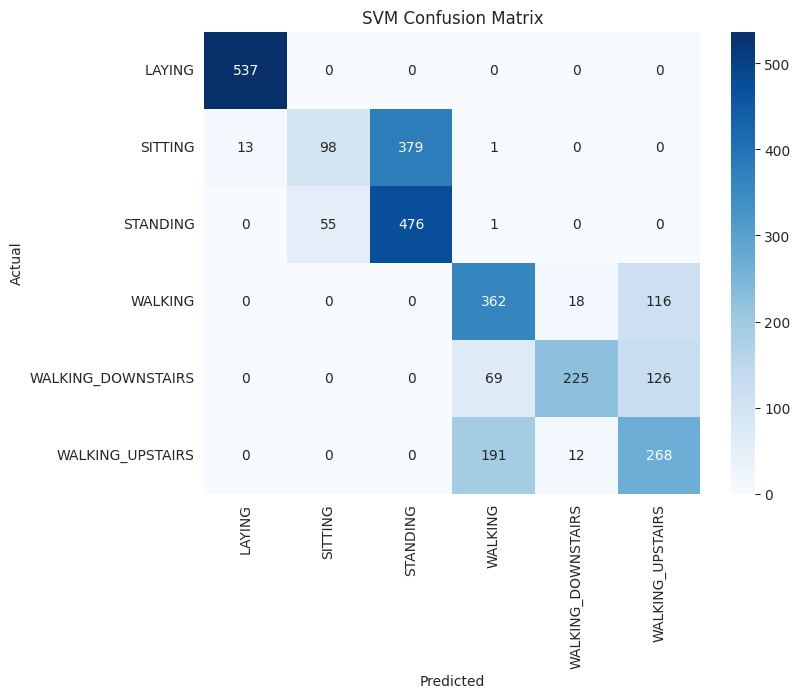

In [12]:
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.savefig("{} .png".format(os.path.join(images_path , 'SVM Confusion Matrix')))
plt.show()

In [13]:
xgb_model = XGBClassifier(random_state=40, max_iter=1)
xgb_model.fit(np.squeeze(X_train_reshaped), np.argmax(y_train_encoded, axis=1))
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = xgb_model.predict(np.squeeze(X_test_reshaped))
classification_rep = classification_report(y_test_labels, y_pred_labels)
print(list(zip(classes, classes_number)))
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:01:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


[('LAYING', 0), ('SITTING', 1), ('STANDING', 2), ('WALKING', 3), ('WALKING_DOWNSTAIRS', 4), ('WALKING_UPSTAIRS', 5)]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.83      0.88       491
           2       0.86      0.94      0.90       532
           3       0.93      0.98      0.96       496
           4       0.97      0.91      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947



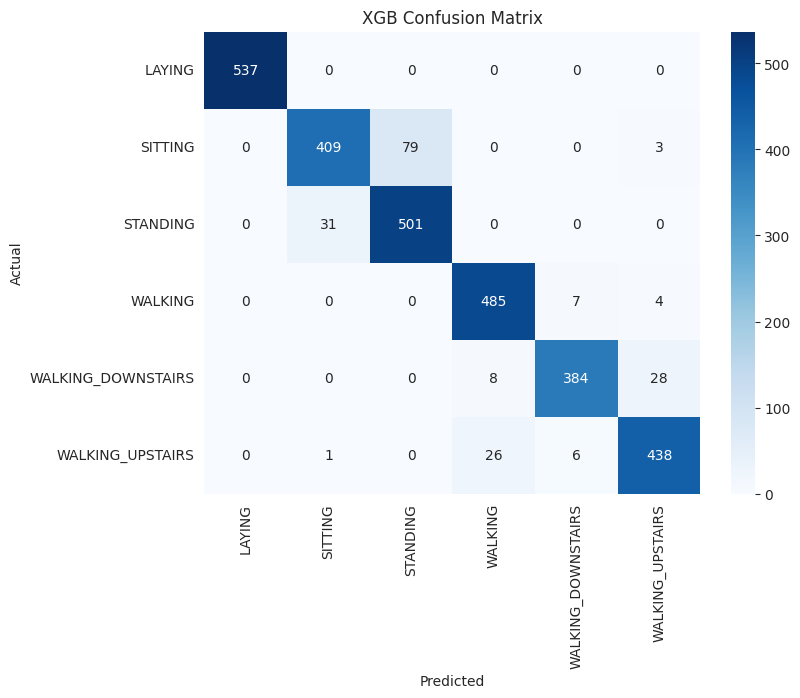

In [14]:
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.savefig("{} .png".format(os.path.join(images_path , 'XGB Confusion Matrix')))
plt.show()

In [15]:
dtree = DecisionTreeClassifier(random_state=40)
dtree.fit(np.squeeze(X_train_reshaped), np.argmax(y_train_encoded, axis=1))
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = xgb_model.predict(np.squeeze(X_test_reshaped))
classification_rep = classification_report(y_test_labels, y_pred_labels)
print(list(zip(classes, classes_number)))
print(classification_rep)

[('LAYING', 0), ('SITTING', 1), ('STANDING', 2), ('WALKING', 3), ('WALKING_DOWNSTAIRS', 4), ('WALKING_UPSTAIRS', 5)]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.83      0.88       491
           2       0.86      0.94      0.90       532
           3       0.93      0.98      0.96       496
           4       0.97      0.91      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947



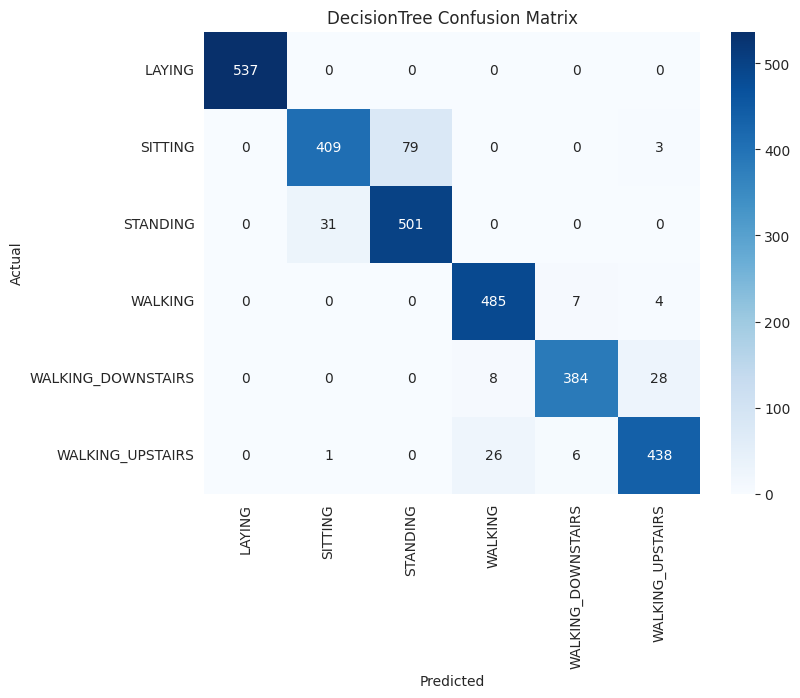

In [16]:
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DecisionTree Confusion Matrix')
plt.savefig("{} .png".format(os.path.join(images_path , 'DecisionTree Confusion Matrix')))
plt.show()

In [21]:
rfc = RandomForestClassifier(n_estimators=1, random_state=40)
rfc.fit(np.squeeze(X_train_reshaped), np.argmax(y_train_encoded, axis=1))
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = xgb_model.predict(np.squeeze(X_test_reshaped))
classification_rep = classification_report(y_test_labels, y_pred_labels)
print(list(zip(classes, classes_number)))
print(classification_rep)

[('LAYING', 0), ('SITTING', 1), ('STANDING', 2), ('WALKING', 3), ('WALKING_DOWNSTAIRS', 4), ('WALKING_UPSTAIRS', 5)]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.83      0.88       491
           2       0.86      0.94      0.90       532
           3       0.93      0.98      0.96       496
           4       0.97      0.91      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947



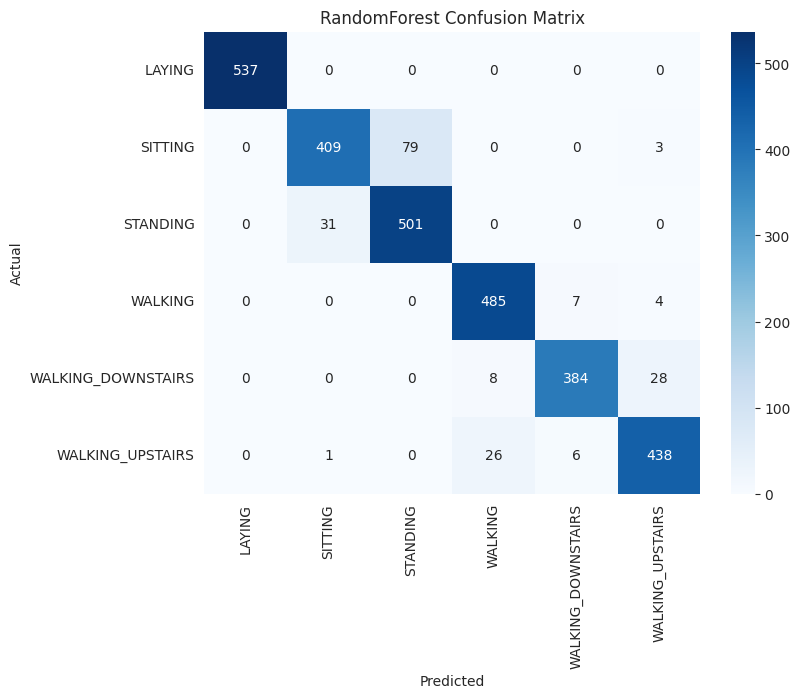

In [22]:
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.savefig("{} .png".format(os.path.join(images_path , 'RandomForest Confusion Matrix')))
plt.show()